In [27]:
# PLA example with Iris dataset
#Author: [Alaa Othman]
#Date: [April/2025]
#Learning From Data (LFD) Course: Lec1
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [32]:
def predict(inputs, weights):
    activation = np.dot(inputs, weights)  # Weighted sum of inputs
    return 1.0 if activation >= 0.0 else -1.0

def plot(matrix, weights=None, title="Prediction Matrix"):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)

    # Set proper axis limits
    plt.xlim(X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5)
    plt.ylim(X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5)

    # Define colormap: Red for class -1, Blue for class +1
    colormap = {1: 'blue', -1: 'red'}
    
    # Decision boundary plot
    if weights is not None:
        x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
        y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        grid_points = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
        Z = np.array([predict(p, weights) for p in grid_points])
        Z = Z.reshape(xx.shape)

        # Use colormap so background matches class colors
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)  # Red-Blue colormap
        plt.colorbar()

    # Scatter plot for data points with same colors
    for i in range(len(matrix)):
        plt.scatter(matrix[i][1], matrix[i][2], 
                    s=160, 
                    c=colormap[matrix[i][-1]],  # Assign color based on class
                    label=f"Class {int(matrix[i][-1])}" if i < 2 else "",
                    edgecolors='k')

    #plt.legend(fontsize=12, loc=1)
    plt.show()

In [33]:
# Load the Iris dataset
iris = datasets.load_iris()
X_data = iris.data  # Features
y = iris.target  # Target classes

# Convert the problem to binary classification (classifying between Setosa and Versicolor)
mask = (y == 0) | (y == 1)  # Keep only Setosa (0) and Versicolor (1)
X_data = X_data[mask]
y = y[mask]

# Convert classes to +1 and -1
y = np.where(y != 0, 1, -1)  # Setosa -> +1, Versicolor -> -1

# Select only the first two features for visualization
X_data = X_data[:, [1, 2]]  # Use features 1 (sepal width) and 2 (petal length)

In [34]:
# Create the matrix in the desired format
matrix = np.hstack((np.ones((X_data.shape[0], 1)), X_data, y.reshape(-1, 1)))  # Add bias column and labels

# Initial weights for the model: [Bias weight, Weight for Feature 1, Weight for Feature 2]
weights = [0.0, 0.1, 0.3]  # 3 weights for bias and 2 features
# Set parameters for training
nb_epoch = 20  # Number of training epochs
l_rate = 0.2   # Learning rate

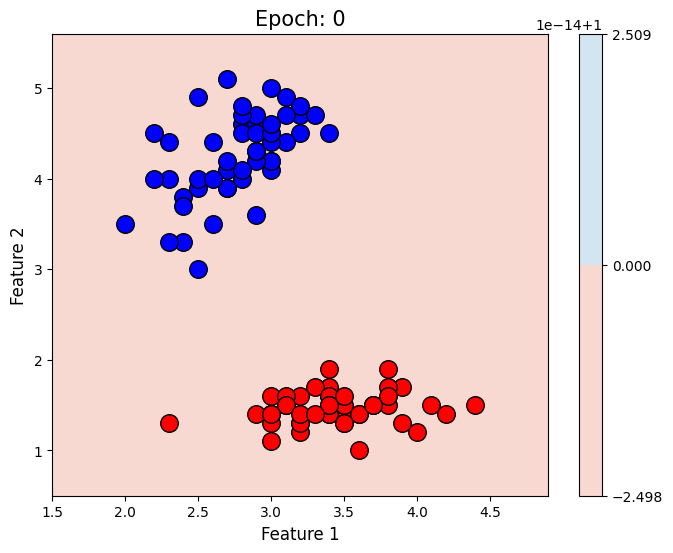

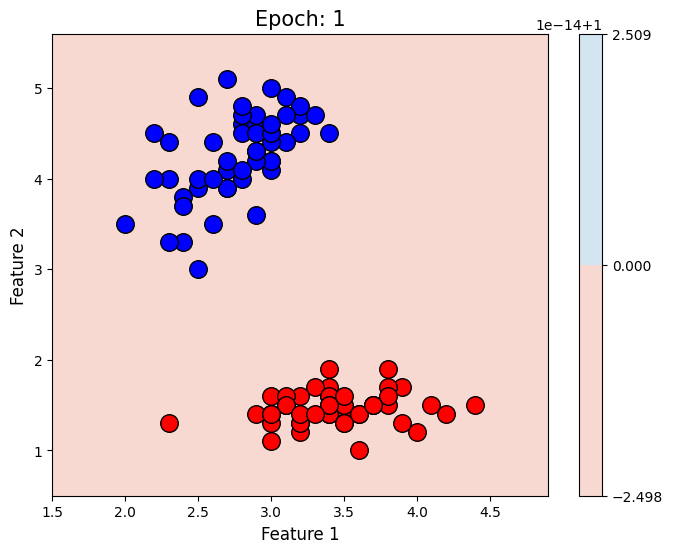

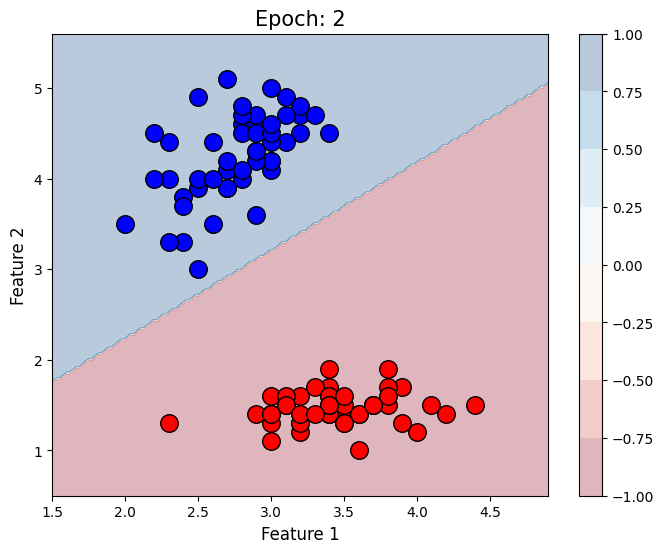

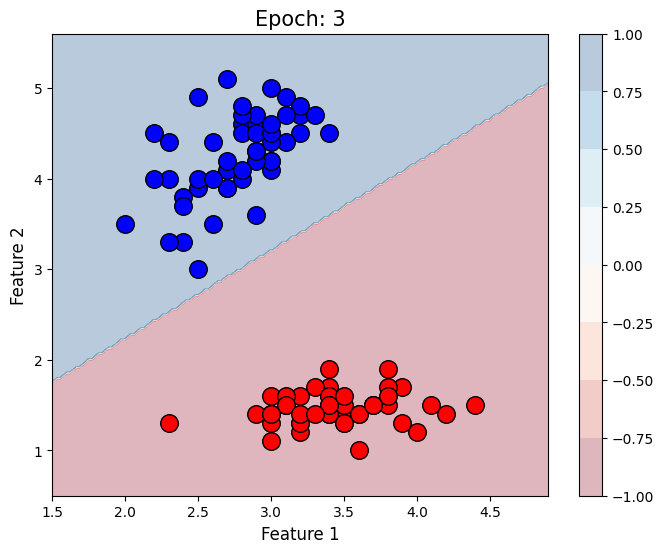

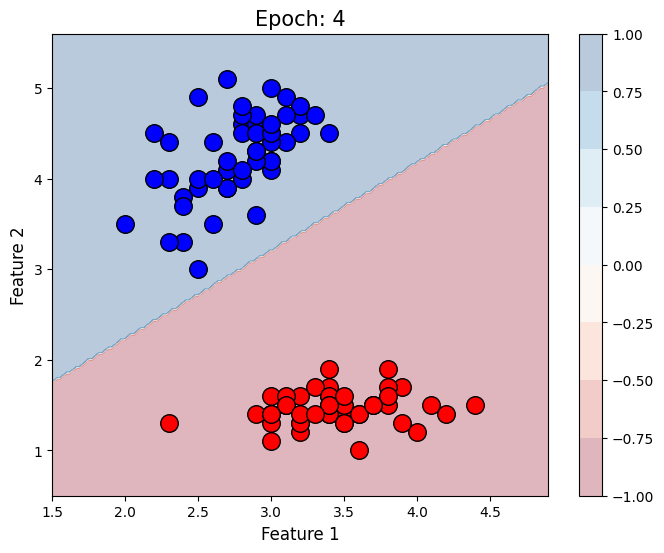

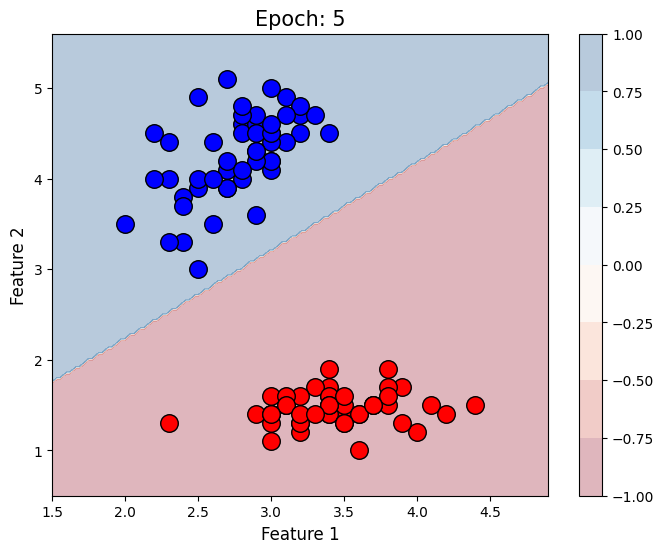

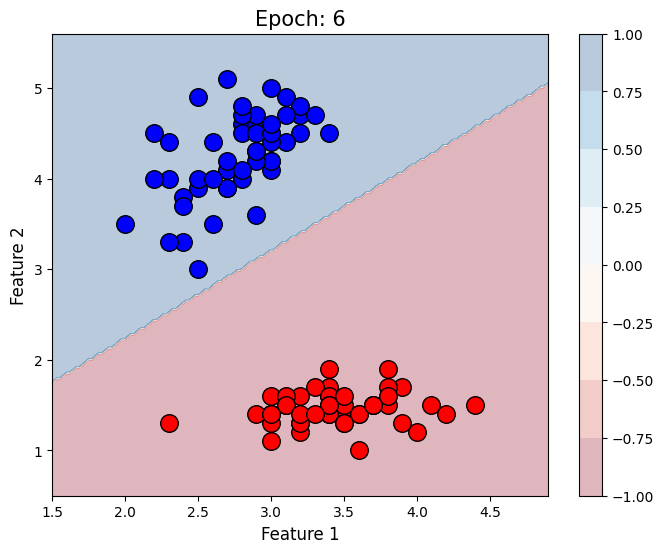

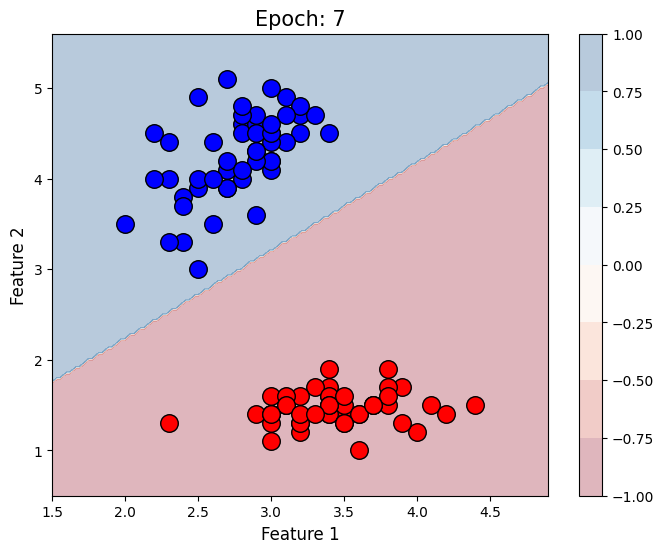

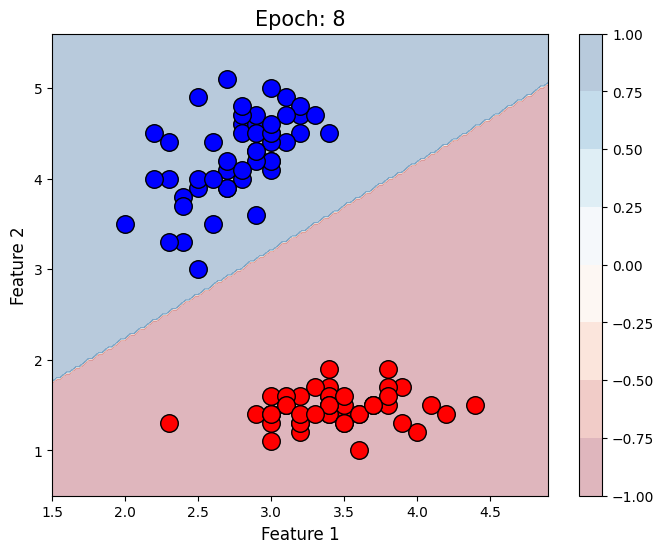

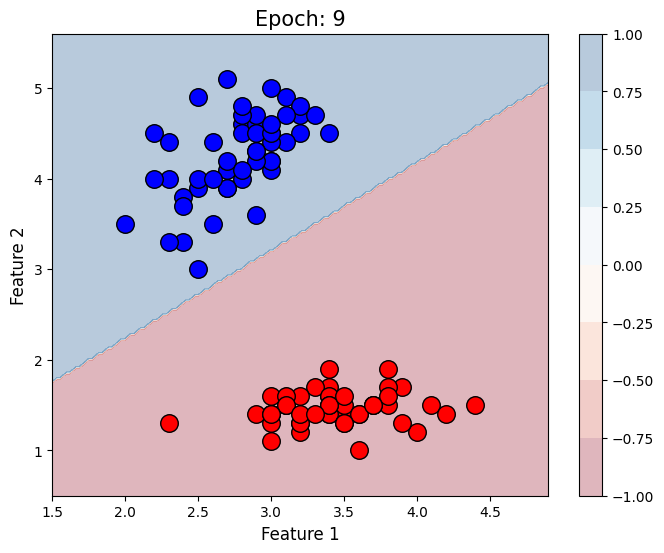

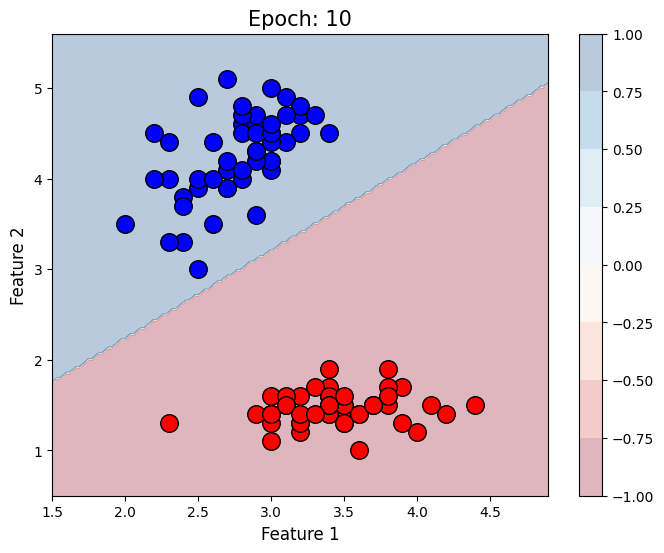

In [ ]:
plot(matrix, weights, title="Epoch: 0")  # Initial plot
## Training loop
for epoch in range(nb_epoch):
    
    for i in range(len(matrix)):
        # ---> B- Model evaluation: 
        # -------> B1- Calculate predictions based on current weights
        wTX = np.dot(matrix[i][:-1], weights)  # Exclude the last element (label)
        pred = 1 if wTX >= 0 else -1  # Determine prediction
     
        # ---> C- Model update (optimization)
        if matrix[i][-1] != pred:  # If there is an error, update weights
            for j in range(len(weights)):  # Update each weight
                weights[j] += (l_rate * matrix[i][j] * matrix[i][-1]) 

    # Plot the decision boundary after each epoch
    plot(matrix, weights, title="Epoch: %d" % (epoch + 1))
